## GEOG6670 Assignment 3/4 - Vanniman 
   ### Due 2/24/2026


Problem: For this assignment, I would like to explore how the variables within Theme 1 - Socioeconomic Status and the total overall theme of the Center of Disease Control and Prevention's (CDC) Social Vulnerability Index (SVI) vary spatially over the state of Michigan. It will then give reference to how Kalamazoo fits within this pattern. This will help expand the understanding of the context within my thesis. 

Data: For the data in this assignment, I will be downloading the SVI data by county divisions for the year of 2022 from the CDC's website. For the county polygons, I will reference the geojson file from last lecture. 

Steps: To do this, it will be first necessary to join the data. Then, the functions of '.head', '.info', and '.describe' will be used to make sure the join has worked properly and also to get a sense of the data a a whole. Pandas will be utilized here. Next geopandas will be used to generate the maps for each variable and the overall score for each county for Theme 1. It would be ideal to set up a loop function here to run all of necessary variables for the maps in one snippet of code (I did run into some challenges here and was not able to make a loop work in the way I was looking for.). While the legends will not be identical here, the number of classifications will be. It will still benefit the context of this research to understand which counties have the highest, average, or lowest scores in each variable. (I would be interested in seeing if it is possible to set up a legend utilizing manual intervals rather than a classification type such as natural breaks or equal interval.) Then, a line chart and histogram can be created through matplotlib to provide another visualization of the data in frequencies. 
These steps will provide the necessary insights into how Kalamazoo County compares to other counties in the state of Michigan in their Theme 1 values. 

In [37]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import mapclassify
import requests

IMPORTING DATA, CLEANING, AND VEIWING HEAD, INFO, AND/OR MAP

Michigan Counties Polygons

In [2]:
michigan_counties = 'https://services3.arcgis.com/dxRQUfTDNtfqZ301/arcgis/rest/services/County/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'
response = requests.get(michigan_counties)
data = response.json()  

df_michigan_counties = pd.json_normalize(data['features'])
df_michigan_counties.head()

,type,id,geometry.type,geometry.coordinates,properties.OBJECTID,properties.FIPSCode,properties.Name,properties.FeatureID,properties.MapLayout,properties.FIPSNum,properties.Label,properties.Type,properties.CntyCode,properties.Peninsula,properties.MGFVersion,properties.Shape__Area,properties.Shape__Length,properties.GlobalID
0,Feature,342,Polygon,"[[[-83.3185842773758, 44.5116473678583], [-83....",342,001,Alcona,db9600c4-8fab-4c75-9a52-3ebe807e7ec2,landscape,1,Alcona County,County,1,Lower,V25,1.798557e+09,172519.815622,324fedbc-244e-40ef-89e2-ca15d2fdf578
1,Feature,343,MultiPolygon,"[[[[-86.7165564271397, 46.4793219833863], [-86...",343,003,Alger,93326140-a6c5-441b-986b-3d2c073d7fe3,landscape,3,Alger County,County,3,Upper,V25,2.424879e+09,390876.655767,65f15d53-82e4-46d8-a8c0-5c5d27749c7e
2,Feature,344,Polygon,"[[[-85.543196673991, 42.4214408299828], [-85.5...",344,005,Allegan,44e588fc-53f0-4cd8-9877-06eb90675f97,landscape,5,Allegan County,County,5,Lower,V25,2.180969e+09,192581.554412,e7e824d2-8e9d-4a54-9ca5-b86a82a9f815
3,Feature,345,MultiPolygon,"[[[[-83.3639644600199, 44.8936580393633], [-83...",345,007,Alpena,e0b32534-3e91-428a-830c-4a52b8978972,landscape,7,Alpena County,County,7,Lower,V25,1.539373e+09,288786.046531,2f175508-f9f8-4c16-a608-9ec9c7117f17
4,Feature,346,MultiPolygon,"[[[[-85.417909730163, 44.9002397739182], [-85....",346,009,Antrim,03bfe597-e287-4f4c-ad00-decaa11b1ce8,landscape,9,Antrim County,County,9,Lower,V25,1.358721e+09,180700.647106,feaa7f06-1876-4d7e-97ff-faa297bab6d5


In [3]:
df_michigan_counties.info()

<class 'pandas.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   type                      83 non-null     str    
 1   id                        83 non-null     int64  
 2   geometry.type             83 non-null     str    
 3   geometry.coordinates      83 non-null     object 
 4   properties.OBJECTID       83 non-null     int64  
 5   properties.FIPSCode       83 non-null     str    
 6   properties.Name           83 non-null     str    
 7   properties.FeatureID      83 non-null     str    
 8   properties.MapLayout      83 non-null     str    
 9   properties.FIPSNum        83 non-null     int64  
 10  properties.Label          83 non-null     str    
 11  properties.Type           83 non-null     str    
 12  properties.CntyCode       83 non-null     str    
 13  properties.Peninsula      82 non-null     str    
 14  properties.MGFVersion  

<Axes: >

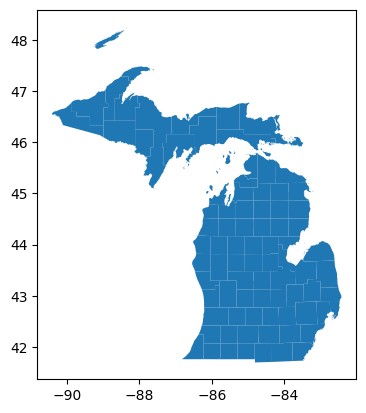

In [5]:
gdf_mi_counties = gpd.read_file(michigan_counties)
gdf_mi_counties.plot()

In [27]:
gdf_mi_counties.head()

,OBJECTID,FIPSCode,Name,FeatureID,MapLayout,FIPSNum,Label,Type,CntyCode,Peninsula,MGFVersion,Shape__Area,Shape__Length,GlobalID,geometry
0,342,001,Alcona,db9600c4-8fab-4c75-9a52-3ebe807e7ec2,landscape,1,Alcona County,County,1,Lower,V25,1.798557e+09,172519.815622,324fedbc-244e-40ef-89e2-ca15d2fdf578,"POLYGON ((-83.31858 44.51165, -83.31859 44.511..."
1,343,003,Alger,93326140-a6c5-441b-986b-3d2c073d7fe3,landscape,3,Alger County,County,3,Upper,V25,2.424879e+09,390876.655767,65f15d53-82e4-46d8-a8c0-5c5d27749c7e,"MULTIPOLYGON (((-86.71656 46.47932, -86.71653 ..."
2,344,005,Allegan,44e588fc-53f0-4cd8-9877-06eb90675f97,landscape,5,Allegan County,County,5,Lower,V25,2.180969e+09,192581.554412,e7e824d2-8e9d-4a54-9ca5-b86a82a9f815,"POLYGON ((-85.5432 42.42144, -85.54645 42.4214..."
3,345,007,Alpena,e0b32534-3e91-428a-830c-4a52b8978972,landscape,7,Alpena County,County,7,Lower,V25,1.539373e+09,288786.046531,2f175508-f9f8-4c16-a608-9ec9c7117f17,"MULTIPOLYGON (((-83.36396 44.89366, -83.36421 ..."
4,346,009,Antrim,03bfe597-e287-4f4c-ad00-decaa11b1ce8,landscape,9,Antrim County,County,9,Lower,V25,1.358721e+09,180700.647106,feaa7f06-1876-4d7e-97ff-faa297bab6d5,"MULTIPOLYGON (((-85.41791 44.90024, -85.41799 ..."


CDC SVI Data

In [20]:
df_michigan_svi = pd.read_csv(filepath_or_buffer='Michigan_county.csv')
df_michigan_svi.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,26,Michigan,MI,26001,Alcona County,26001,"Alcona County, Michigan",674.655036,10238,0,...,0.3,0.2,0.3,0.2,0.0,0.1,3.0,0.7,0.3,0.2
1,26,Michigan,MI,26003,Alger County,26003,"Alger County, Michigan",915.033821,8866,0,...,0.8,0.7,3.2,1.3,0.0,0.3,4.2,1.3,0.1,0.1
2,26,Michigan,MI,26005,Allegan County,26005,"Allegan County, Michigan",825.252751,120189,0,...,0.7,0.1,0.2,0.1,0.0,0.1,3.4,0.7,0.4,0.4
3,26,Michigan,MI,26007,Alpena County,26007,"Alpena County, Michigan",571.896276,28911,0,...,0.5,0.2,0.1,0.1,0.0,0.1,2.6,0.6,0.3,0.4
4,26,Michigan,MI,26009,Antrim County,26009,"Antrim County, Michigan",475.678697,23662,0,...,0.4,0.1,0.5,0.2,0.0,0.1,2.4,0.4,0.4,0.4


In [7]:
df_michigan_svi.info()

<class 'pandas.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Columns: 158 entries, ST to MP_OTHERRACE
dtypes: float64(75), int64(79), str(4)
memory usage: 102.6 KB


In [8]:
df_michigan_svi.dtypes

ST                int64
STATE               str
ST_ABBR             str
STCNTY            int64
COUNTY              str
                 ...   
MP_NHPI         float64
EP_TWOMORE      float64
MP_TWOMORE      float64
EP_OTHERRACE    float64
MP_OTHERRACE    float64
Length: 158, dtype: object

Clean Michigan SVI Data 'County' Variable to Match Polygon properties.Name Variable 

In [32]:
df_michigan_svi["COUNTY"] = df_michigan_svi["COUNTY"].str.replace("County", "", regex=False).str.strip() 

In [59]:
df_filtered_svi = df_michigan_svi[df_michigan_svi['SPL_THEME1'] != -999.0] #Exclude rows where SPL_THEME1 is -999.0

In [60]:
gdf_mi_counties.iloc[74,[2]]

Name    St. Joseph
Name: 74, dtype: str

In [67]:
df_filtered_svi.iloc[74,[4]]

COUNTY    St. Joseph
Name: 74, dtype: string

JOIN

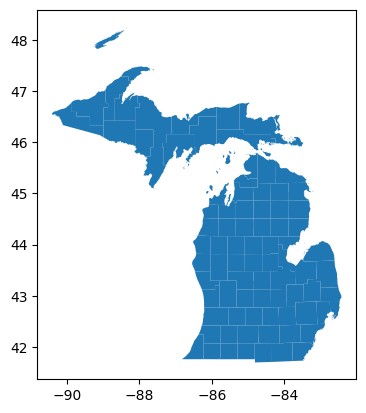

In [78]:
df_filtered_svi["COUNTY"] = df_filtered_svi["COUNTY"].astype("string")
gdf_joined = gdf_mi_counties.join(
    df_filtered_svi.set_index("COUNTY"),
    on="Name",
    lsuffix="_cty",
    rsuffix="_inc",
)
gdf_joined.plot();

In [79]:
gdf_joined.head()

,OBJECTID,FIPSCode,Name,FeatureID,MapLayout,FIPSNum,Label,Type,CntyCode,Peninsula,MGFVersion,Shape__Area,Shape__Length,GlobalID,geometry,ST,STATE,ST_ABBR,STCNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,342,001,Alcona,db9600c4-8fab-4c75-9a52-3ebe807e7ec2,landscape,1,Alcona County,County,1,Lower,V25,1.798557e+09,172519.815622,324fedbc-244e-40ef-89e2-ca15d2fdf578,"POLYGON ((-83.31858 44.51165, -83.31859 44.511...",26,Michigan,MI,26001,26001,"Alcona County, Michigan",674.655036,10238,0,10320,52,4832,160,2417,230,239,61,1035,103,741,81,434,79,3693,17,1317,25,2339,159,90,28,5,64,635,62,54,23,985,119,44,21,168,46,116,16,23.9,2.3,6.3,1.6,21.4,2.0,8.8,1.0,4.3,0.8,36.1,0.2,12.9,0.2,23.0,1.6,1.8,0.6,0.1,0.6,6.2,0.6,0.5,0.2,9.5,1.2,0.9,0.4,3.5,0.9,1.1,0.2,0.5610,0.6220,0.3902,0.5976,0.1341,2.3049,0.4146,0.9878,0.0122,0.9268,0.0122,0.0488,1.9878,0.1951,0.1098,0.1098,0.1098,0.0244,0.7317,0.1341,0.0732,0.1829,1.1463,0.0366,5.5488,0.1098,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0,2,7673,966,107,44,25,189,0,32,17,31,17,2,5,311,72,26,18,20.0,2.1,0.4,0.2,1.8,0.0,0.3,0.2,0.3,0.2,0.0,0.1,3.0,0.7,0.3,0.2
1,343,003,Alger,93326140-a6c5-441b-986b-3d2c073d7fe3,landscape,3,Alger County,County,3,Upper,V25,2.424879e+09,390876.655767,65f15d53-82e4-46d8-a8c0-5c5d27749c7e,"MULTIPOLYGON (((-86.71656 46.47932, -86.71653 ...",26,Michigan,MI,26003,26003,"Alger County, Michigan",915.033821,8866,0,6208,32,3274,162,1478,224,156,56,716,130,411,104,278,102,2218,34,1599,83,1436,147,96,42,0,60,1600,32,206,65,434,84,56,37,193,74,1050,27,18.9,2.9,5.1,1.9,21.9,3.8,6.3,1.6,3.5,1.3,25.0,0.4,18.0,0.9,18.3,1.9,2.9,1.3,0.0,0.7,18.0,0.4,3.3,1.0,7.0,1.3,1.7,1.1,5.9,2.2,11.8,0.3,0.2561,0.4024,0.5488,0.2317,0.0366,1.4756,0.1707,0.6829,0.2805,0.6951,0.0854,0.0000,1.7439,0.1098,0.7561,0.7561,0.7561,0.4390,0.4512,0.6220,0.4634,0.9634,2.9390,0.7683,6.9146,0.2927,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8142,532,95,691,69,175,0,70,66,283,117,0,15,375,119,6,8,16.2,2.8,7.8,0.8,2.0,0.0,0.8,0.7,3.2,1.3,0.0,0.3,4.2,1.3,0.1,0.1
2,344,005,Allegan,44e588fc-53f0-4cd8-9877-06eb90675f97,landscape,5,Allegan County,County,5,Lower,V25,2.180969e+09,192581.554412,e7e824d2-8e9d-4a54-9ca5-b86a82a9f815,"POLYGON ((-85.5432 42.42144, -85.54645 42.4214...",26,Michigan,MI,26005,26005,"Allegan County, Michigan",825.252751,120189,0,51880,87,44621,588,20873,1611,1991,351,8268,605,6856,774,6110,924,20871,113,28389,0,12629,678,2786,497,899,270,16597,757,1348,327,5670,435,1048,254,1365,242,1273,26,17.6,1.4,3.4,0.6,18.5,1.3,8.3,0.9,5.1,0.8,17.4,0.1,23.6,0.0,10.6,0.6,6.2,1.1,0.8,100.0,13.8,0.6,2.6,0.6,10.9,0.8,2.4,0.6,3.1,0.5,1.1,0.0,0.1951,0.0122,0.0366,0.5122,0.3415,1.0976,0.0976,0.09

In [80]:
gdf_joined.info

<bound method DataFrame.info of     OBJECTID FIPSCode       Name                             FeatureID  \
0        342      001     Alcona  db9600c4-8fab-4c75-9a52-3ebe807e7ec2   
1        343      003      Alger  93326140-a6c5-441b-986b-3d2c073d7fe3   
2        344      005    Allegan  44e588fc-53f0-4cd8-9877-06eb90675f97   
3        345      007     Alpena  e0b32534-3e91-428a-830c-4a52b8978972   
4        346      009     Antrim  03bfe597-e287-4f4c-ad00-decaa11b1ce8   
..       ...      ...        ...                                   ...   
78       420      157    Tuscola  4094fecf-a57e-4162-b9b5-ee3e90917dec   
79       421      159  Van Buren  d228b005-b014-415f-a812-194d894cf930   
80       422      161  Washtenaw  497b3905-b29d-49eb-90b6-e0806cc84d4f   
81       423      163      Wayne  49ae2658-121a-4b9e-babd-214e80d377ad   
82       424      165    Wexford  f25c1542-af39-4b48-99cf-967c8bd1c636   

    MapLayout  FIPSNum             Label    Type CntyCode Peninsula  \
0   land

In [88]:
gdf_joined.describe()

,OBJECTID,FIPSNum,Shape__Area,Shape__Length,ST,STCNTY,FIPS,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
count,83.000000,83.000000,8.300000e+01,8.300000e+01,83.0,83.000000,83.000000,83.000000,8.300000e+01,83.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.00000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.00000,83.00000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,8.300000e+01,83.000000,83.000000,83.000000,83.000000,83.000000,83.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,383.000000,83.000000,1.813692e+09,2.345674e+05,26.0,26083.000000,26083.000000,682.047535,1.211798e+05,0.0,55186.108434,82.216867,48304.253012,394.710843,24956.855422,1106.13253,3640.566265,339.096386,11831.493976,545.216867,6896.409639,432.409639,6204.951807,543.939759,21528.012048,55.626506,25897.156627,22.746988,16906.00000,633.60241,2930.819277,265.530120,1619.506024,207.795181,32093.746988,259.795181,4974.168675,330.120482,2833.397590,269.373494,778.879518,135.012048,3468.084337,284.795181,2616.325301,63.397590,22.454217,1.879518,5.795181,1.142169,22.109639,1.996386,8.259036,0.987952,6.077108,0.967470,22.410843,0.171084,19.495181,0.130120,16.700000,1.140964,4.768675,0.957831,0.562651,9.989157,13.593976,0.385542,4.881928,0.766265,8.339759,0.957831,1.486747,0.485542,6.213253,1.121687,2.965060,0.126506,0.498383,0.489864,0.493242,0.495443,0.490599,2.467531,0.498531,0.497061,0.494710,0.496475,0.486047,0.454311,2.428604,0.498678,0.497502,0.497502,0.497502,0.496180,0

SVI VARIABLES AND OVERALL THEME MAPS 

In [81]:
cols = gdf_joined.columns
cols
cols[0:] #gives list of all headers
for c, i in enumerate(cols): #gives index and header name for each column
    pd.set_option('display.max_columns', None)     # show all columns in DataFrame rep
    print(c, i)

0 OBJECTID
1 FIPSCode
2 Name
3 FeatureID
4 MapLayout
5 FIPSNum
6 Label
7 Type
8 CntyCode
9 Peninsula
10 MGFVersion
11 Shape__Area
12 Shape__Length
13 GlobalID
14 geometry
15 ST
16 STATE
17 ST_ABBR
18 STCNTY
19 FIPS
20 LOCATION
21 AREA_SQMI
22 E_TOTPOP
23 M_TOTPOP
24 E_HU
25 M_HU
26 E_HH
27 M_HH
28 E_POV150
29 M_POV150
30 E_UNEMP
31 M_UNEMP
32 E_HBURD
33 M_HBURD
34 E_NOHSDP
35 M_NOHSDP
36 E_UNINSUR
37 M_UNINSUR
38 E_AGE65
39 M_AGE65
40 E_AGE17
41 M_AGE17
42 E_DISABL
43 M_DISABL
44 E_SNGPNT
45 M_SNGPNT
46 E_LIMENG
47 M_LIMENG
48 E_MINRTY
49 M_MINRTY
50 E_MUNIT
51 M_MUNIT
52 E_MOBILE
53 M_MOBILE
54 E_CROWD
55 M_CROWD
56 E_NOVEH
57 M_NOVEH
58 E_GROUPQ
59 M_GROUPQ
60 EP_POV150
61 MP_POV150
62 EP_UNEMP
63 MP_UNEMP
64 EP_HBURD
65 MP_HBURD
66 EP_NOHSDP
67 MP_NOHSDP
68 EP_UNINSUR
69 MP_UNINSUR
70 EP_AGE65
71 MP_AGE65
72 EP_AGE17
73 MP_AGE17
74 EP_DISABL
75 MP_DISABL
76 EP_SNGPNT
77 MP_SNGPNT
78 EP_LIMENG
79 MP_LIMENG
80 EP_MINRTY
81 MP_MINRTY
82 EP_MUNIT
83 MP_MUNIT
84 EP_MOBILE
85 MP_MOBILE
86

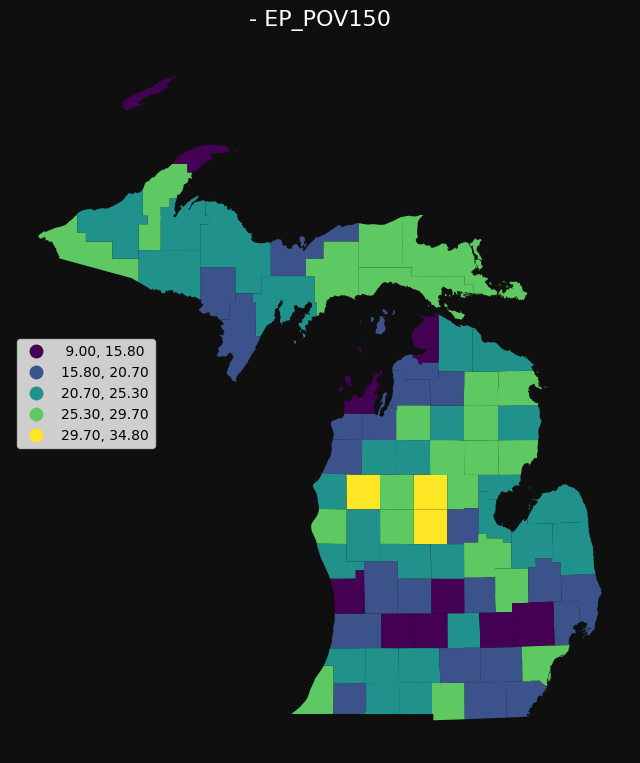

In [82]:
fig, ax = plt.subplots(figsize=(8, 10), facecolor="#0f0f0f") #hex color code
ax.set_aspect("equal")
ax.set_xticklabels([])
ax.set_yticklabels([])

gdf_joined.plot(
    ax=ax,
    column=cols[60], #column for data - median household income 
    scheme="natural_breaks", #classification - 'natural_breaks', 'quantiles', 'equal interval', 'standard deviation'
    legend=True,
    cmap="viridis",
    edgecolor="white",
    linewidth=0,
    markersize=80,
    legend_kwds={"loc": "center left"},
)
plt.title(f"- {cols[60]}", fontsize=16, color="white")
ax.set_axis_off()

In EP_POV150 (Percent of persons below 150% poverty), Kalamazoo falls in the middle of the classification system between 20.70 and 25.30. There are 26 other counties that also fall into this classification, which is the category with the highest number of counties. This means that Kalamazoo is like a number of other counties and falls in the middle of the range.

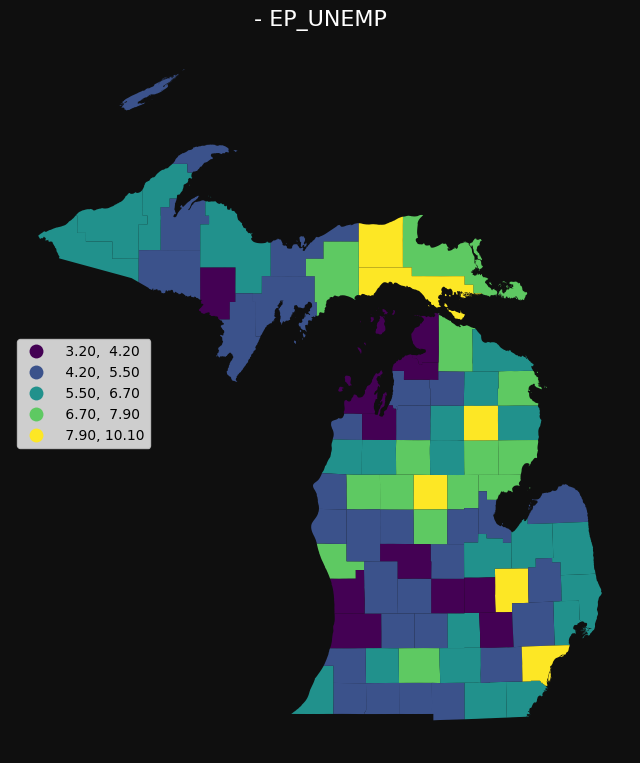

In [83]:
fig, ax = plt.subplots(figsize=(8, 10), facecolor="#0f0f0f") #hex color code
ax.set_aspect("equal")
ax.set_xticklabels([])
ax.set_yticklabels([])

gdf_joined.plot(
    ax=ax,
    column=cols[62], #column for data - median household income 
    scheme="natural_breaks", #classification - 'natural_breaks', 'quantiles', 'equal interval', 'standard deviation'
    legend=True,
    cmap="viridis",
    edgecolor="white",
    linewidth=0,
    markersize=80,
    legend_kwds={"loc": "center left"},
)
plt.title(f"- {cols[62]}", fontsize=16, color="white")
ax.set_axis_off()

In EP_UNEMP (Unemployment rate estimate), Kalamazoo falls right in the middle of the classification system between 5.50 and 6.70. There are 21 other counties that fall into this classification. This is the category with the second-highest number of counties. This shows Kalamazoo is like some of the counties, but not the majority. Again, also falling into the middle of the classification. 

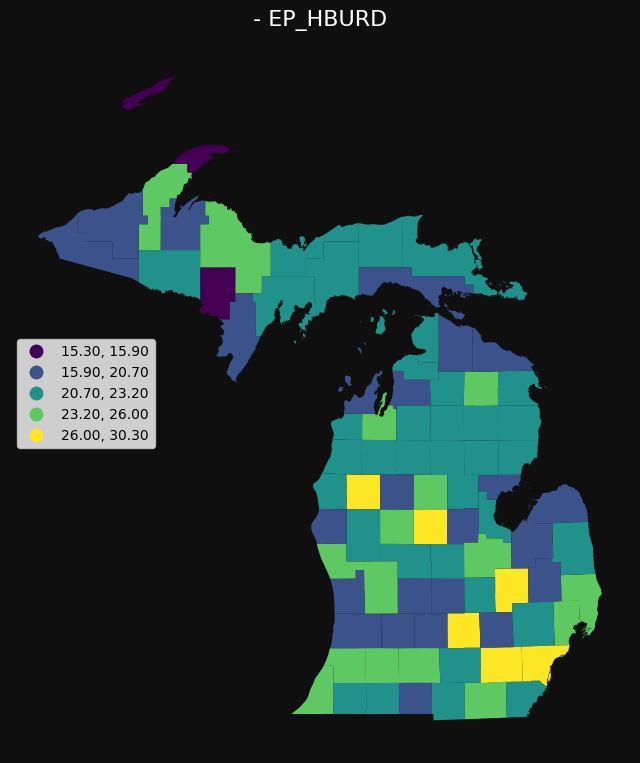

In [84]:
fig, ax = plt.subplots(figsize=(8, 10), facecolor="#0f0f0f") #hex color code
ax.set_aspect("equal")
ax.set_xticklabels([])
ax.set_yticklabels([])

gdf_joined.plot(
    ax=ax,
    column=cols[64], #column for data - median household income 
    scheme="natural_breaks", #classification - 'natural_breaks', 'quantiles', 'equal interval', 'standard deviation'
    legend=True,
    cmap="viridis",
    edgecolor="white",
    linewidth=0,
    markersize=80,
    legend_kwds={"loc": "center left"},
)
plt.title(f"- {cols[64]}", fontsize=16, color="white")
ax.set_axis_off()

In EP_HBURD (Percentage of housing cost-burdened occupied housing units with annual income lass than $75,000 (30%+ of income spent on housing costs)), Kalamazoo falls slightly higher (one category higher) than the middle of this classification, between 23.20 and 26.00. This is the category with the third highest number of counties in it. The two categories higher are the two categories sequentially bellow the category Kalamazoo falls into. This means Kalamazoo has a higher housing cost burden compared to many other counties. 

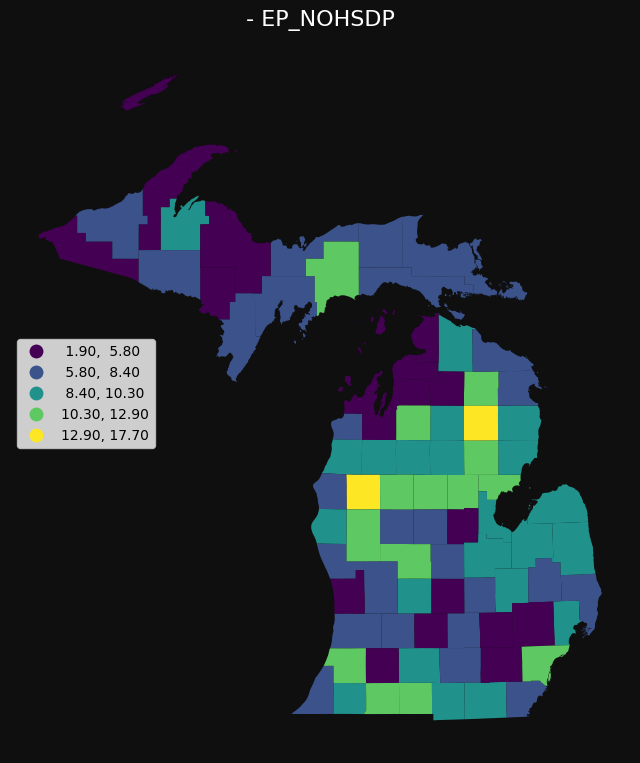

In [85]:
fig, ax = plt.subplots(figsize=(8, 10), facecolor="#0f0f0f") #hex color code
ax.set_aspect("equal")
ax.set_xticklabels([])
ax.set_yticklabels([])

gdf_joined.plot(
    ax=ax,
    column=cols[66], #column for data - median household income 
    scheme="natural_breaks", #classification - 'natural_breaks', 'quantiles', 'equal interval', 'standard deviation'
    legend=True,
    cmap="viridis",
    edgecolor="white",
    linewidth=0,
    markersize=80,
    legend_kwds={"loc": "center left"},
)
plt.title(f"- {cols[66]}", fontsize=16, color="white")
ax.set_axis_off()

In EP_NOHSDP (Percentage of persons with no high school diploma (age 25+)), Kalamazoo falls into the lowest classification. This is between 1.90 and 5.80. This is also the category with the third-highest number of counties. The two categories with higher numbers of counties are the sequentially next highest categories. This shows Kalamazoo has a lower percentage of persons with no high school diploma than many of the other counties. 

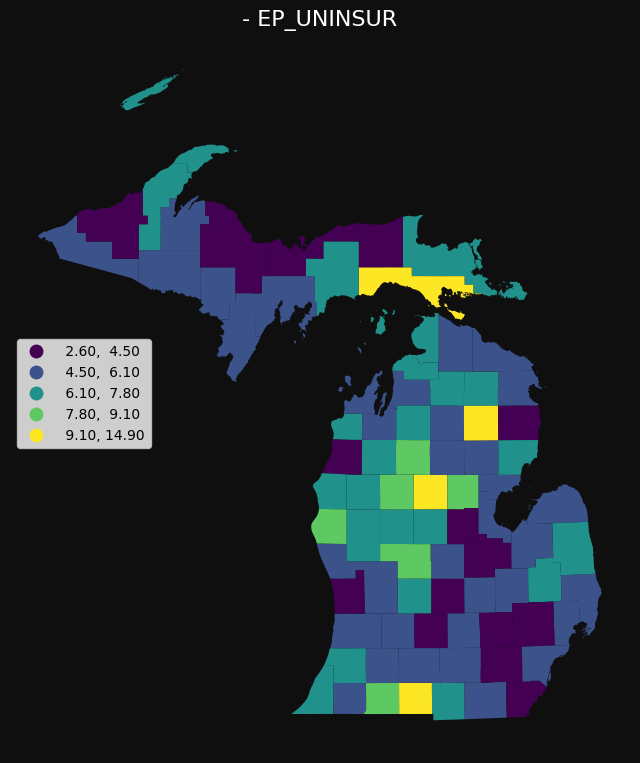

In [86]:
fig, ax = plt.subplots(figsize=(8, 10), facecolor="#0f0f0f") #hex color code
ax.set_aspect("equal")
ax.set_xticklabels([])
ax.set_yticklabels([])

gdf_joined.plot(
    ax=ax,
    column=cols[68], #column for data - median household income 
    scheme="natural_breaks", #classification - 'natural_breaks', 'quantiles', 'equal interval', 'standard deviation'
    legend=True,
    cmap="viridis",
    edgecolor="white",
    linewidth=0,
    markersize=80,
    legend_kwds={"loc": "center left"},
)
plt.title(f"- {cols[68]}", fontsize=16, color="white")
ax.set_axis_off()

In EP_UNINSUR (Percentage uninsured in the total civilian noninstitutionalized population estimate), Kalamazoo falls into the second lowest category of the classification, between 4.50 and 6.10. This category also has the highest number of counties found in it, so Kalamazoo is similar to many of the counties for this variable.

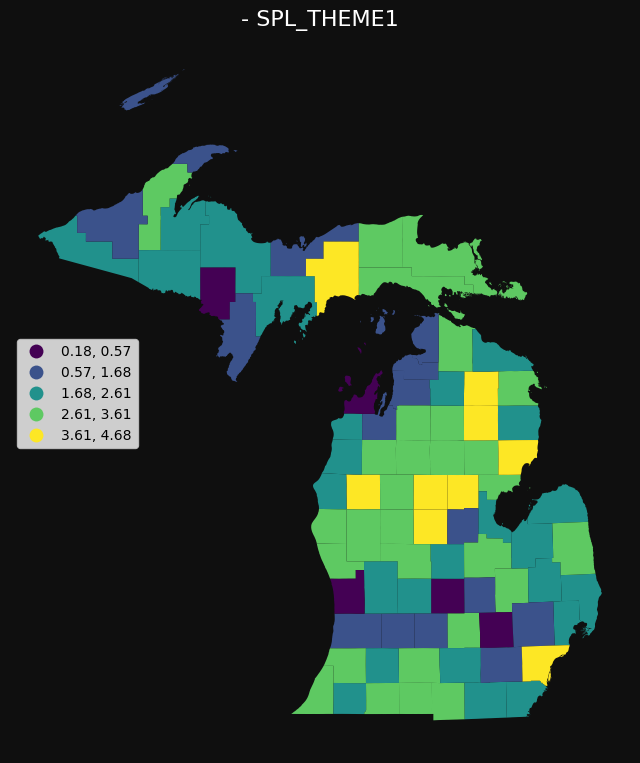

In [87]:
fig, ax = plt.subplots(figsize=(8, 10), facecolor="#0f0f0f") #hex color code
ax.set_aspect("equal")
ax.set_xticklabels([])
ax.set_yticklabels([])

gdf_joined.plot(
    ax=ax,
    column=cols[97], #column for data - median household income 
    scheme="natural_breaks", #classification - 'natural_breaks', 'quantiles', 'equal interval', 'standard deviation'
    legend=True,
    cmap="viridis",
    edgecolor="white",
    linewidth=0,
    markersize=80,
    legend_kwds={"loc": "center left"},
)
plt.title(f"- {cols[97]}", fontsize=16, color="white")
ax.set_axis_off()

In SPL_THEME1 (Sum of series for socioeconomic status theme), Kalamazoo falls right into the middle of the classfication once again. It falls between 1.68 and 2.61. This classification has the second highest number of counties fall in it, with the category which has the highest number being the next highest. This allows us to see that Kalamazoo's overall vulnerability within Theme 1 falls in the middle and is similar to some of the other counties. 

SVI VARIABLES AND OVERALL THEME PLOTS

In [101]:
df_theme1 = df_filtered_svi[["COUNTY", "SPL_THEME1"]]
df_theme1.head()

,COUNTY,SPL_THEME1
0,Alcona,2.3049
1,Alger,1.4756
2,Allegan,1.0976
3,Alpena,2.8293
4,Antrim,1.1706


Kalamazoo falls between 1.68 and 2.61. 

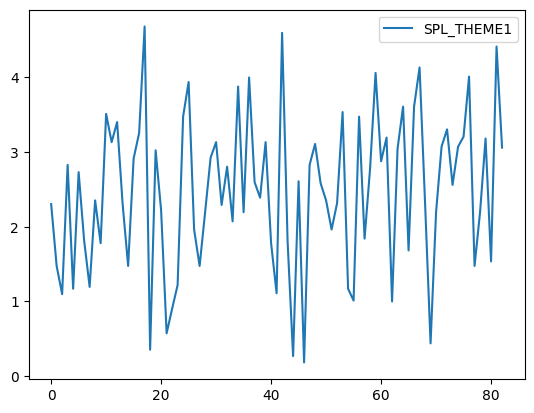

In [108]:
df_theme1.plot();

<Axes: ylabel='Frequency'>

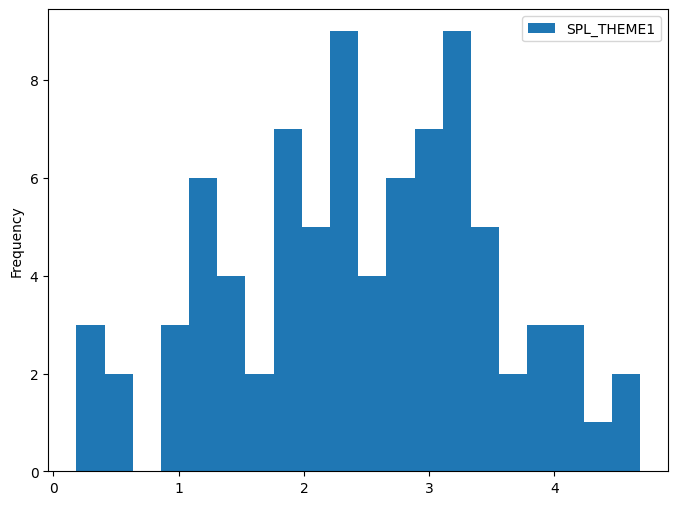

In [116]:
df_theme1.plot.hist(bins=20, figsize=(8,6))

In [105]:
df_pov150 = df_filtered_svi[["COUNTY", "EP_POV150"]]
df_pov150.head()

,COUNTY,EP_POV150
0,Alcona,23.9
1,Alger,18.9
2,Allegan,17.6
3,Alpena,28.0
4,Antrim,16.8


Kalamazoo falls between 20.70 and 25.30.

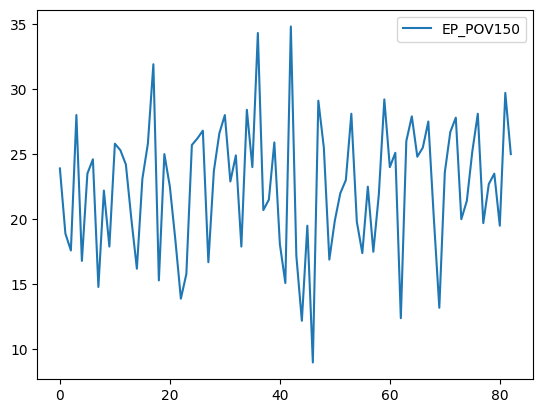

In [109]:
df_pov150.plot();

<Axes: ylabel='Frequency'>

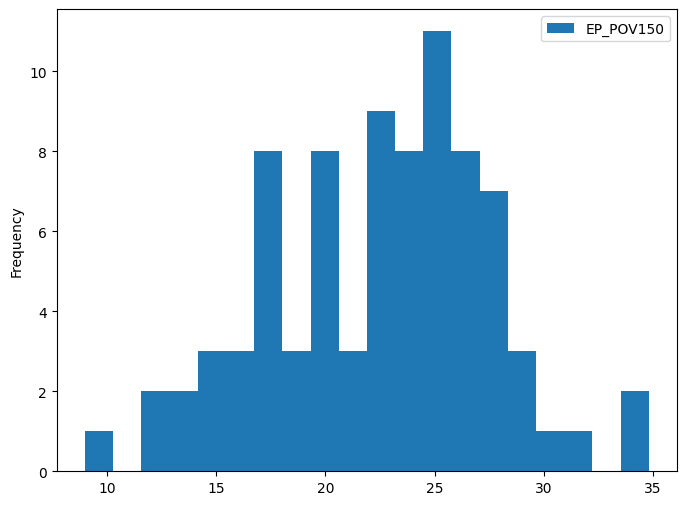

In [118]:
df_pov150.plot.hist(bins=20, figsize=(8,6))

In [111]:
df_unemp = df_filtered_svi[["COUNTY", "EP_UNEMP"]]
df_unemp.head()

,COUNTY,EP_UNEMP
0,Alcona,6.3
1,Alger,5.1
2,Allegan,3.4
3,Alpena,7.4
4,Antrim,4.6


Kalamazoo falls between 5.50 and 6.70. 

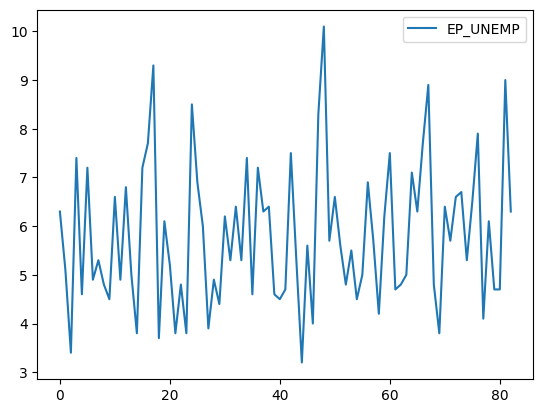

In [112]:
df_unemp.plot();

<Axes: ylabel='Frequency'>

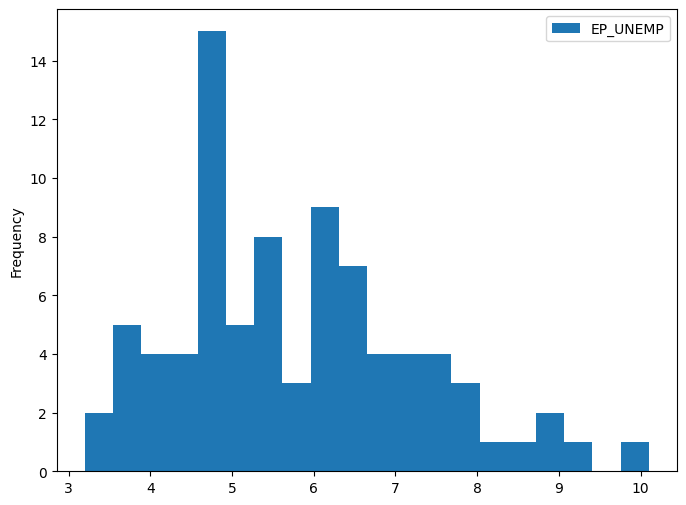

In [119]:
df_unemp.plot.hist(bins=20, figsize=(8,6))

In [106]:
df_hburd = df_filtered_svi[["COUNTY", "EP_HBURD"]]
df_hburd.head()

,COUNTY,EP_HBURD
0,Alcona,21.4
1,Alger,21.9
2,Allegan,18.5
3,Alpena,21.1
4,Antrim,19.6


Kalamazoo falls bewtween 23.20 ad 26.00.

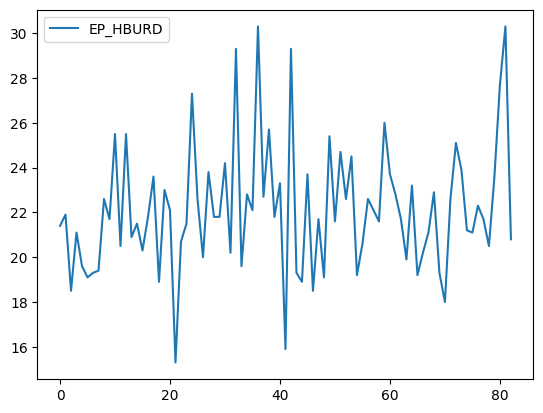

In [113]:
df_hburd.plot();

<Axes: ylabel='Frequency'>

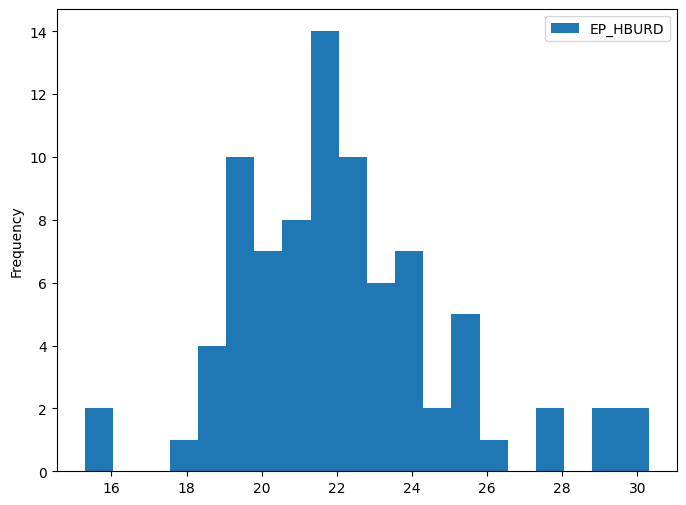

In [120]:
df_hburd.plot.hist(bins=20, figsize=(8,6))

In [107]:
df_nohsdp = df_filtered_svi[["COUNTY", "EP_NOHSDP"]]
df_nohsdp.head()

,COUNTY,EP_NOHSDP
0,Alcona,8.8
1,Alger,6.3
2,Allegan,8.3
3,Alpena,7.2
4,Antrim,5.7


Kalamazoo falls between 1.90 and 5.80. 

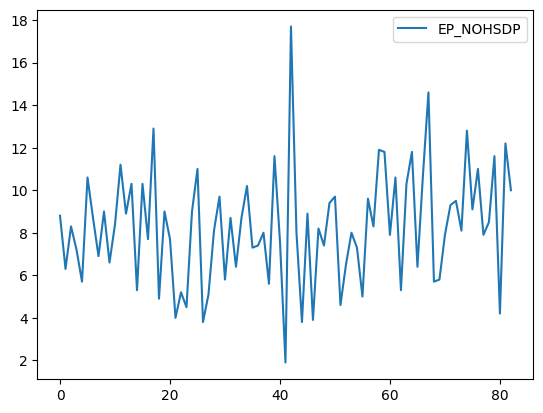

In [114]:
df_nohsdp.plot();

<Axes: ylabel='Frequency'>

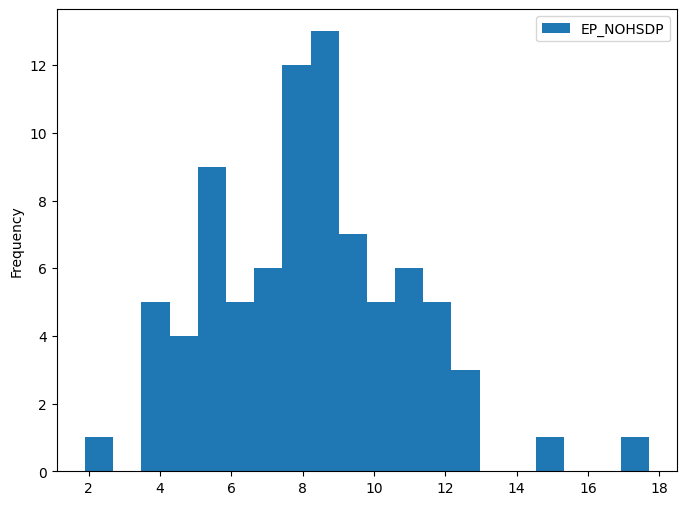

In [122]:
df_nohsdp.plot.hist(bins=20, figsize=(8,6))

In [100]:
df_uninsur = df_filtered_svi[["COUNTY", "EP_UNINSUR"]]
df_uninsur.head()

,COUNTY,EP_UNINSUR
0,Alcona,4.3
1,Alger,3.5
2,Allegan,5.1
3,Alpena,5.5
4,Antrim,5.6


Kalamazoo falls between 4.50 and 6.10.

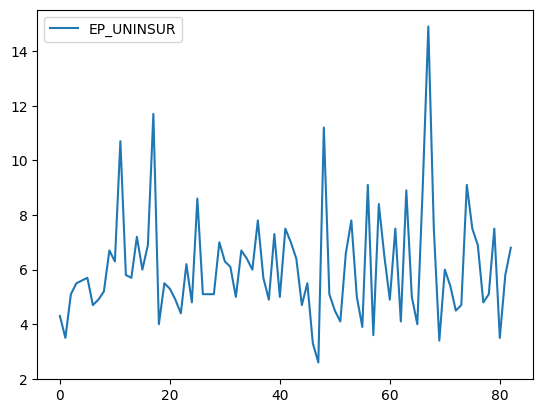

In [115]:
df_uninsur.plot();

<Axes: ylabel='Frequency'>

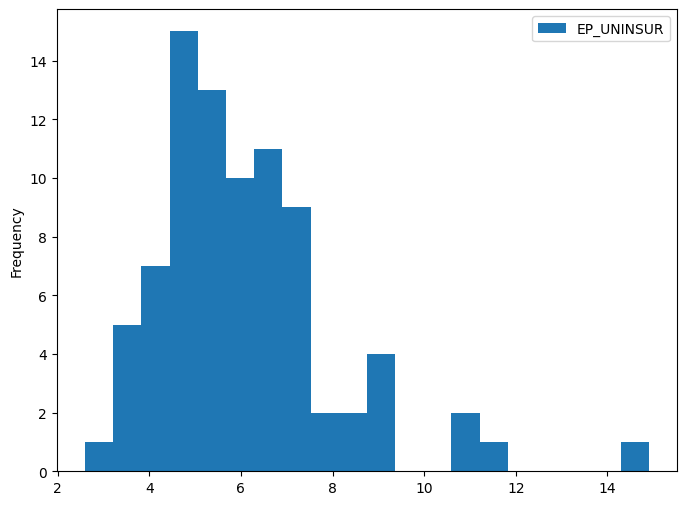

In [124]:
df_uninsur.plot.hist(bins=20, figsize=(8,6))

While Kalamazoo County itself cannot be directly located on each of these charts, the charts help to provide a sense of what the overall distributions, trends, and frequencies are across the entire state. With the values of the categories from the maps created previously, we can identify the range where Kalamazoo County could fall on each graph or chart. The graphs and charts further support the trends shown in the maps and provide a different visual of the data. 